In [1]:
# SPDX-FileCopyrightText: 2021 G2Elab / MAGE
#
# SPDX-License-Identifier: Apache-2.0

# if NoLoad_Jax is not installed 
!pip install noloadj --quiet


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<H1>NoLoad tutorial</H1>
Based on test functions:
 <A href="https://en.wikipedia.org/wiki/Test_functions_for_optimization" 
target="_blank">https://en.wikipedia.org/wiki/Test_functions_for_optimization</A>


<H2>Constrained mono-objective optimization</H2>

<img src=".\img\bar2.png"/>
<img src=".\img\Simionescu.png"/>

<H3>function definition</H3>

In [2]:
def simionescu(x, y, rr, rs, n):
    import jax.numpy as np
    fobj = 0.1 * x * y
    ctr = x * x + y * y - np.power(rr + rs * np.cos(n * np.arctan(x / y)), 2)
    return locals().items()

<H3>plot function</H3>

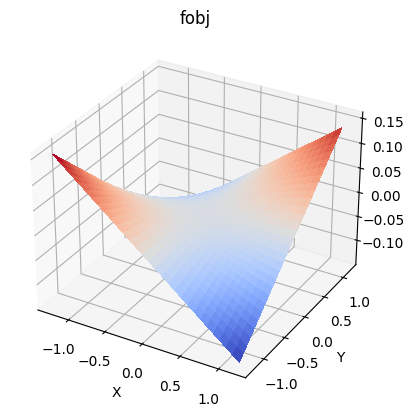

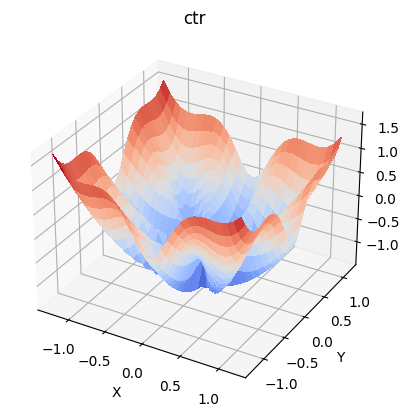

In [3]:
#Plot
from plotTools import plot3D
%matplotlib inline
plot3D(simionescu, [[-1.25,1.25],[-1.25,1.25]], outNames = ['fobj','ctr'], 
       parameters = (1,0.2,8))


<H3>optimize using NoLoad</H3>

Optimization terminated successfully 	(Exit mode 0)
			Current function value: -0.07200000007817449
			Iterations: 8
			Function evaluations: 12
			Gradient evaluations: 8
{'x': -0.8485281520550951, 'y': 0.8485281237139142}
{'fobj': -0.07200000007817449, 'ctr': 1.5634945427223102e-09}


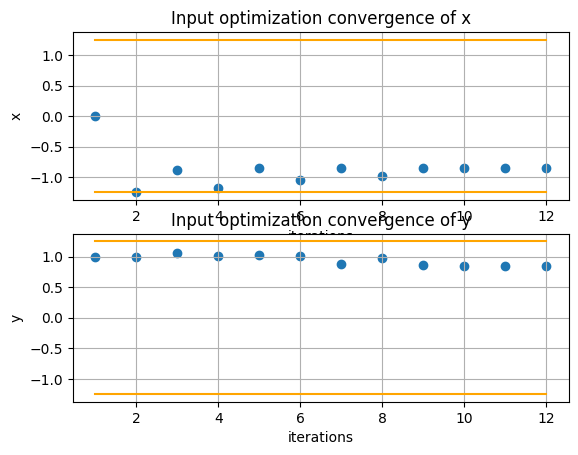

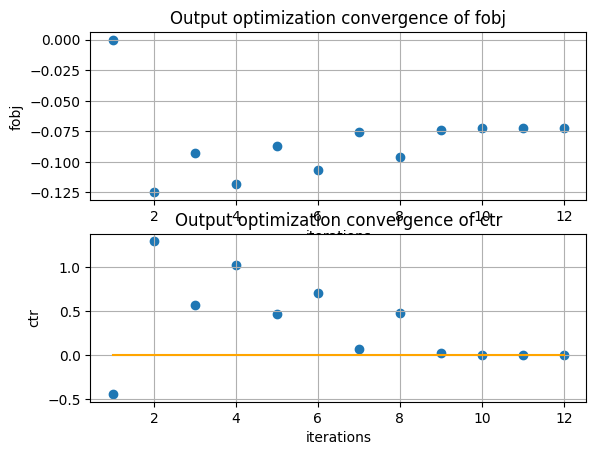

In [4]:
#Optimize
from noloadj.optimization.optimProblem import Spec, OptimProblem
#This function is non defined in [0,0], initial guess must be different from [0,0]
spec = Spec(variables={'x':0., 'y':1.}, bounds={'x':[-1.25, 1.25], 
            'y':[-1.25, 1.25]}, objectives={'fobj':[0.,0.15]},
            ineq_cstr={'ctr':[None, 0]}, #inequality constraints
            )
optim = OptimProblem(model=simionescu, specifications=spec, 
                     parameters={'rr':1, 'rs':0.2, 'n':8})
result = optim.run()

result.printResults()
result.plotResults(['fobj','ctr'])

In [5]:
#It is also possible to iterate by yourself to get results
for name, value in result.getLastInputs().items():
    print(name, '  \t =', value)
for name, value in result.getLastOutputs().items():
    print(name, '  \t =', value)


x   	 = -0.8485281520550951
y   	 = 0.8485281237139142
fobj   	 = -0.07200000007817449
ctr   	 = 1.5634945427223102e-09
